# Face recognition with SVC

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the sklearn 

In [5]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print()
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']

(1140, 62, 47)


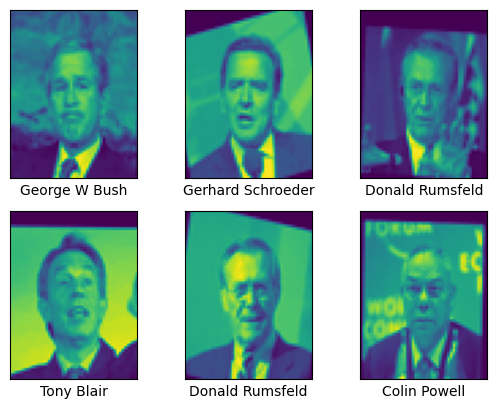

In [7]:
fig,ax=plt.subplots(2,3)
for i,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i])
    axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

# split the data

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(faces.data,faces.target,random_state=42)

In [11]:
print(xtrain.shape)
print()
print(ytrain.shape)
print()
print(xtest.shape)
print()
print(ytest.shape)

(855, 2914)

(855,)

(285, 2914)

(285,)


# Face Recognation Model

In [15]:
#model parameter configuration

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca=PCA(n_components=150,whiten=True,random_state=42)
svc=SVC(kernel='rbf',class_weight='balanced')
pipe_model=make_pipeline(pca,svc)

#train the model

from sklearn.model_selection import GridSearchCV #to get optimum parameter value

param_grid={'svc__C':[1,5,10,20,50],
           'svc__gamma':[0.0001,0.0005,0.001,0.005]
           }
grid=GridSearchCV(pipe_model,param_grid)

%time grid.fit(xtrain,ytrain)

print(grid.best_params_)

CPU times: total: 52.2 s
Wall time: 24.7 s
{'svc__C': 1, 'svc__gamma': 0.005}


In [21]:
model=grid.best_estimator_
print(model)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=1, class_weight='balanced', gamma=0.005))])


In [22]:
yfit=model.predict(xtest)
yfit

array([0, 0, 2, 3, 2, 2, 0, 4, 2, 2, 4, 2, 1, 0, 2, 0, 4, 4, 2, 1, 0, 2,
       1, 4, 2, 4, 4, 2, 2, 1, 3, 1, 1, 0, 0, 0, 2, 0, 3, 4, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 4,
       3, 2, 0, 2, 4, 2, 1, 3, 2, 2, 2, 4, 2, 2, 4, 2, 2, 1, 3, 2, 1, 2,
       0, 0, 2, 2, 2, 4, 2, 0, 2, 1, 2, 3, 2, 4, 2, 3, 2, 4, 2, 1, 2, 2,
       4, 2, 2, 0, 0, 2, 2, 1, 2, 1, 2, 0, 2, 0, 4, 1, 3, 1, 2, 4, 2, 1,
       0, 0, 4, 2, 3, 4, 0, 3, 2, 0, 2, 1, 2, 0, 4, 2, 2, 2, 0, 2, 2, 4,
       2, 2, 4, 2, 0, 4, 0, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2,
       1, 2, 2, 4, 4, 0, 4, 2, 4, 2, 2, 0, 0, 0, 2, 2, 4, 2, 0, 0, 1, 2,
       0, 2, 0, 1, 0, 3, 2, 2, 0, 1, 0, 2, 3, 4, 4, 3, 2, 1, 2, 2, 2, 2,
       2, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 4, 1, 2,
       2, 2, 2, 0, 0, 2, 0, 2, 0, 3, 2, 0, 2, 4, 1, 2, 2, 2, 3, 2, 2, 1,
       4, 2, 2, 0, 4, 3, 4, 2, 2, 0, 0, 2, 4, 1, 2, 3, 2, 0, 2, 1, 4],
      dtype=int64)

# Plot the outcome

Text(0.5, 0.98, 'Predicted names; Incorrect Labels in Red')

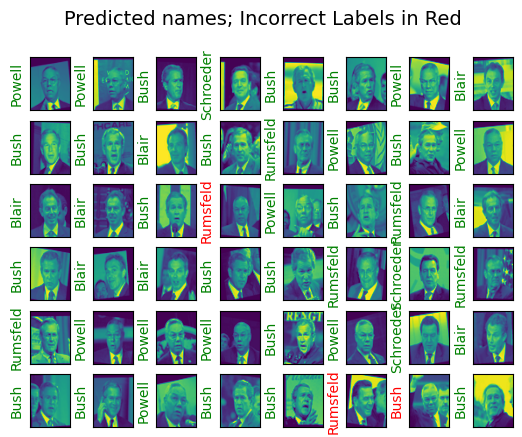

In [29]:
fig,ax=plt.subplots(6,8)
for i ,axi in enumerate(ax.flat):
    axi.imshow(xtest[i].reshape(62,47))
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='green' if yfit[i]==ytest[i] else 'red')
    
fig.suptitle('Predicted names; Incorrect Labels in Red',size=14)

In [28]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

print('Accuracy score:\n',accuracy_score(ytest,yfit))
print()
print('Confusion Mtrics:\n',confusion_matrix(ytest,yfit))
print()


Accuracy score:
 0.8631578947368421

Confusion Mtrics:
 [[ 55   3   6   0   0]
 [  3  24   3   1   1]
 [  2   2 122   1   0]
 [  0   2   3  16   8]
 [  0   2   2   0  29]]



Text(50.72222222222221, 0.5, 'predicted label')

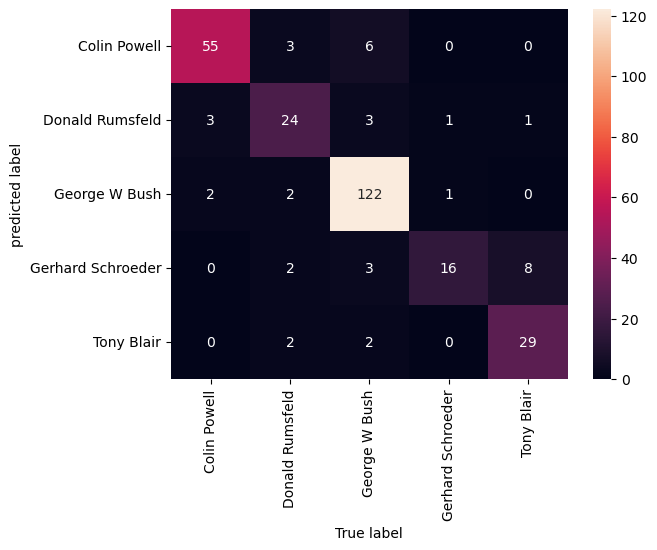

In [30]:
cm=confusion_matrix(ytest,yfit)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.xlabel('True label')
plt.ylabel('predicted label')